ROCHETTE
LEVEQUE

# Chargement des Données

Nous importons le dataset pour obtenir une vue d'ensemble de ses caractéristiques et de ses variables.

In [39]:
data <- read.csv("../data/support2.csv")
head(data)

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,⋯,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
,<dbl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11,⋯,1.1999512,141,7.459961,NA,NA,NA,7,7,,7
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12,⋯,5.5000000,132,7.250000,NA,NA,NA,NA,1,<2 mo. follow-up,1
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12,⋯,2.0000000,134,7.459961,NA,NA,NA,1,0,<2 mo. follow-up,0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11,⋯,0.7999268,139,NA,NA,NA,NA,0,0,no(M2 and SIP pres),0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NA,⋯,0.7999268,143,7.509766,NA,NA,NA,NA,2,no(M2 and SIP pres),2
6,93.01599,1,male,1,4,4,Coma,Coma,1,14,⋯,0.6999512,140,7.659180,NA,NA,NA,NA,1,<2 mo. follow-up,1


# On va utiliser tout le dataset, en rajoutant des valeurs moyennes

In [40]:
data$pafi[is.na(data$pafi)] <- 333.3
data$alb[is.na(data$alb)] <- 3.5
data$bun[is.na(data$bun)] <- 6.51
data$urine[is.na(data$urine)] <- 2502

In [41]:
data[] <- lapply(data, function(x) {
  if (is.numeric(x)) {
    x[is.na(x)] <- median(x, na.rm = TRUE) 
  }
  return(x)
})
head(data)

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,⋯,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
,<dbl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11,⋯,1.1999512,141,7.459961,135,6.51,2502,7,7,,7
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12,⋯,5.5000000,132,7.250000,135,6.51,2502,0,1,<2 mo. follow-up,1
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12,⋯,2.0000000,134,7.459961,135,6.51,2502,1,0,<2 mo. follow-up,0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11,⋯,0.7999268,139,7.419922,135,6.51,2502,0,0,no(M2 and SIP pres),0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,12,⋯,0.7999268,143,7.509766,135,6.51,2502,0,2,no(M2 and SIP pres),2
6,93.01599,1,male,1,4,4,Coma,Coma,1,14,⋯,0.6999512,140,7.659180,135,6.51,2502,0,1,<2 mo. follow-up,1


On regarde le nombre de colonnes vides

In [42]:
colonnes_chaine <- sapply(data, is.character)

nombres_vides <- sapply(data[, colonnes_chaine], function(x) sum(x == ""))

# Afficher les résultats
resultats <- data.frame(
  colonne = names(nombres_vides),
  nombre_vides = nombres_vides
)
resultats

,colonne,nombre_vides
,<chr>,<int>
sex,sex,0
dzgroup,dzgroup,0
dzclass,dzclass,0
income,income,2982
race,race,42
ca,ca,0
dnr,dnr,30
sfdm2,sfdm2,1400


On va retirer la colonne income, et les lignes ou race et dnr sont vides. On va aussi tester sans la colonne sfmd2 pour l'instant

In [43]:
data <- data[, !names(data) %in% "income"]
#data <- data[, !names(data) %in% "sfdm2"]
data <- data[!(is.na(data$sfdm2) | data$sfdm2 == ""), ]
data <- data[!(is.na(data$race) | data$race == ""), ]
data <- data[!(is.na(data$dnr) | data$dnr == ""), ]

colonnes_chaine <- sapply(data, is.character)

nombres_vides <- sapply(data[, colonnes_chaine], function(x) sum(x == ""))

# Afficher les résultats
resultats <- data.frame(
  colonne = names(nombres_vides),
  nombre_vides = nombres_vides
)
resultats

,colonne,nombre_vides
,<chr>,<int>
sex,sex,0
dzgroup,dzgroup,0
dzclass,dzclass,0
race,race,0
ca,ca,0
dnr,dnr,0
sfdm2,sfdm2,0


In [44]:
head(data)

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,⋯,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
,<dbl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12,⋯,2.0000000,134,7.459961,135,6.51,2502,1,0,<2 mo. follow-up,0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11,⋯,0.7999268,139,7.419922,135,6.51,2502,0,0,no(M2 and SIP pres),0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,12,⋯,0.7999268,143,7.509766,135,6.51,2502,0,2,no(M2 and SIP pres),2
6,93.01599,1,male,1,4,4,Coma,Coma,1,14,⋯,0.6999512,140,7.659180,135,6.51,2502,0,1,<2 mo. follow-up,1
7,62.37097,1,male,0,9,659,CHF,COPD/CHF/Cirrhosis,1,14,⋯,1.5998535,132,7.479492,135,6.51,2502,0,1,no(M2 and SIP pres),1
11,47.94498,1,male,0,7,114,CHF,COPD/CHF/Cirrhosis,1,12,⋯,1.0000000,134,7.419922,135,6.51,2502,2,1,no(M2 and SIP pres),1


In [45]:
modreg <- glm(hospdead ~ ., data=data, family = binomial)
summary(modreg)

Warning message:
“glm.fit: l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Call:
glm(formula = hospdead ~ ., family = binomial, data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -8.49    0.00    0.00    0.00    8.49  

Coefficients: (3 not defined because of singularities)
                            Estimate Std. Error    z value Pr(>|z|)    
(Intercept)               -1.467e+15  9.064e+07  -16189332   <2e-16 ***
age                        3.738e+12  7.265e+04   51458018   <2e-16 ***
death                      5.901e+14  2.616e+06  225562162   <2e-16 ***
sexmale                   -1.724e+13  1.584e+06  -10887097   <2e-16 ***
slos                      -6.948e+12  9.121e+04  -76181818   <2e-16 ***
d.time                    -5.268e+11  2.375e+03 -221829053   <2e-16 ***
dzgroupCHF                 2.491e+14  3.019e+06   82497923   <2e-16 ***
dzgroupCirrhosis           3.013e+14  4.194e+06   71854705   <2e-16 ***
dzgroupColon Cancer        1.777e+14  6.310e+06   28155811   <2e-16 ***
dzgroupComa                2.577e+14  4.175e+06   617

On affiche la régression

In [46]:
data$hatY  <- predict(modreg, type="response")
predicted_classes <- ifelse(data$hatY > 0.5, 1, 0)
confusion_matrix <- table(Predicted = predicted_classes, Actual = data$hospdead)
confusion_matrix

         Actual
Predicted    0    1
        0 5263  791
        1   89 1503

`geom_smooth()` using formula = 'y ~ x'


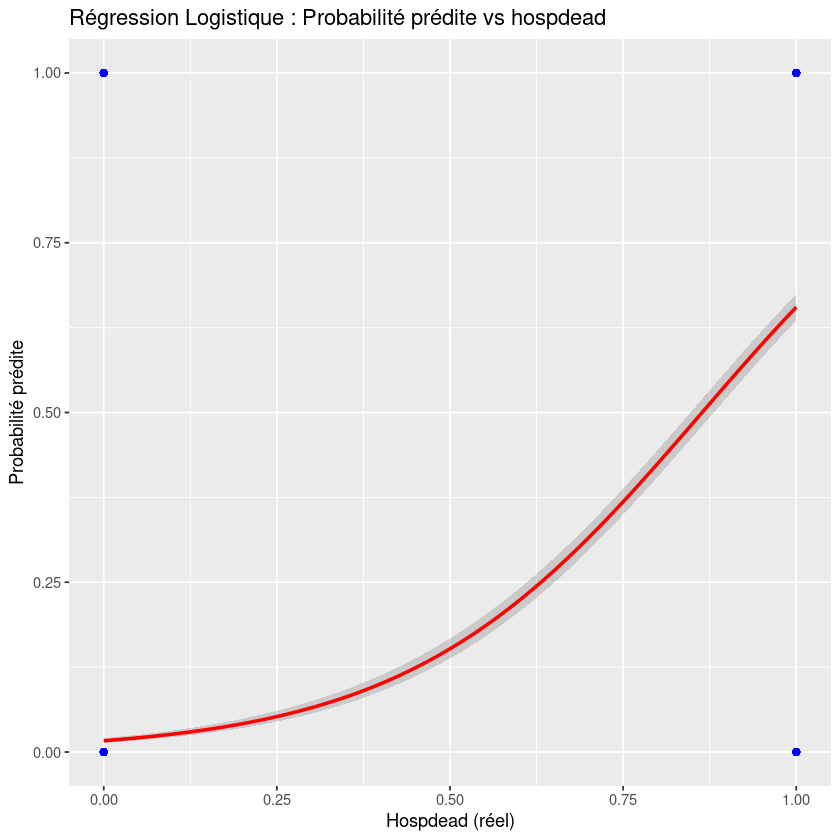

In [47]:
ggplot(data, aes(x = hospdead, y = hatY)) +
  geom_point(alpha = 0.5, color = "blue") +  # Nuage de points
  geom_smooth(method = "glm", method.args = list(family = "binomial"), color = "red") + # Courbe ajustée
  ggtitle("Régression Logistique : Probabilité prédite vs hospdead") +
  xlab("Hospdead (réel)") +
  ylab("Probabilité prédite")

In [48]:
false_positive_rate <- confusion_matrix[2,1] / sum(confusion_matrix[, 1])
print(false_positive_rate)

[1] 0.0166293


In [49]:
false_negative_rate <- confusion_matrix[1, 2] / sum(confusion_matrix[, 2])
print(false_negative_rate)

[1] 0.3448126


In [50]:
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(accuracy)

[1] 0.8849071


stepwise

In [51]:
regboth = step(lm(hospdead~., data=data), direction='both')

Start:  AIC=-21643.8
hospdead ~ age + death + sex + slos + d.time + dzgroup + dzclass + 
    num.co + edu + scoma + charges + totcst + totmcst + avtisst + 
    race + sps + aps + surv2m + surv6m + hday + diabetes + dementia + 
    ca + prg2m + prg6m + dnr + dnrday + meanbp + wblc + hrt + 
    resp + temp + pafi + alb + bili + crea + sod + ph + glucose + 
    bun + urine + adlp + adls + sfdm2 + adlsc + hatY


Step:  AIC=-21643.8
hospdead ~ age + death + sex + slos + d.time + dzgroup + num.co + 
    edu + scoma + charges + totcst + totmcst + avtisst + race + 
    sps + aps + surv2m + surv6m + hday + diabetes + dementia + 
    ca + prg2m + prg6m + dnr + dnrday + meanbp + wblc + hrt + 
    resp + temp + pafi + alb + bili + crea + sod + ph + glucose + 
    bun + urine + adlp + adls + sfdm2 + adlsc + hatY

           Df Sum of Sq    RSS    AIC
- dzgroup   7     0.245 444.10 -21654
- race      4     0.200 444.06 -21648
- ca        2     0.026 443.89 -21647
- crea      1     0.000 443.86 -2164

In [52]:
modreg2 <- glm(hospdead ~ death + slos + d.time + dzgroup + num.co + edu + scoma + charges + totcst + totmcst + avtisst + race + sps + aps + surv2m + surv6m + prg2m + prg6m + dnr + dnrday + adlp + adls + sfdm2 + adlsc, data=data, family = binomial)
summary(modreg2)

Warning message:
“glm.fit: l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Call:
glm(formula = hospdead ~ death + slos + d.time + dzgroup + num.co + 
    edu + scoma + charges + totcst + totmcst + avtisst + race + 
    sps + aps + surv2m + surv6m + prg2m + prg6m + dnr + dnrday + 
    adlp + adls + sfdm2 + adlsc, family = binomial, data = data)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-0.0075015   0.0000000   0.0000000   0.0003641   0.0027621  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)
(Intercept)               5.853e+03  2.342e+04   0.250    0.803
death                    -5.842e+03  2.341e+04  -0.250    0.803
slos                      2.640e+01  3.773e+01   0.700    0.484
d.time                   -2.639e+01  3.760e+01  -0.702    0.483
dzgroupCHF                5.211e-02  9.852e+01   0.001    1.000
dzgroupCirrhosis         -8.870e-02  1.032e+02  -0.001    0.999
dzgroupColon Cancer       2.349e+01  5.757e+02   0.041    0.967
dzgroupComa               4.864e-01  8.469e+01   0.006   

In [53]:
data$hatY  <- predict(modreg2, type="response")
predicted_classes <- ifelse(data$hatY > 0.5, 1, 0)
confusion_matrix <- table(Predicted = predicted_classes, Actual = data$hospdead)
confusion_matrix

         Actual
Predicted    0    1
        0 5352    0
        1    0 2294

`geom_smooth()` using formula = 'y ~ x'


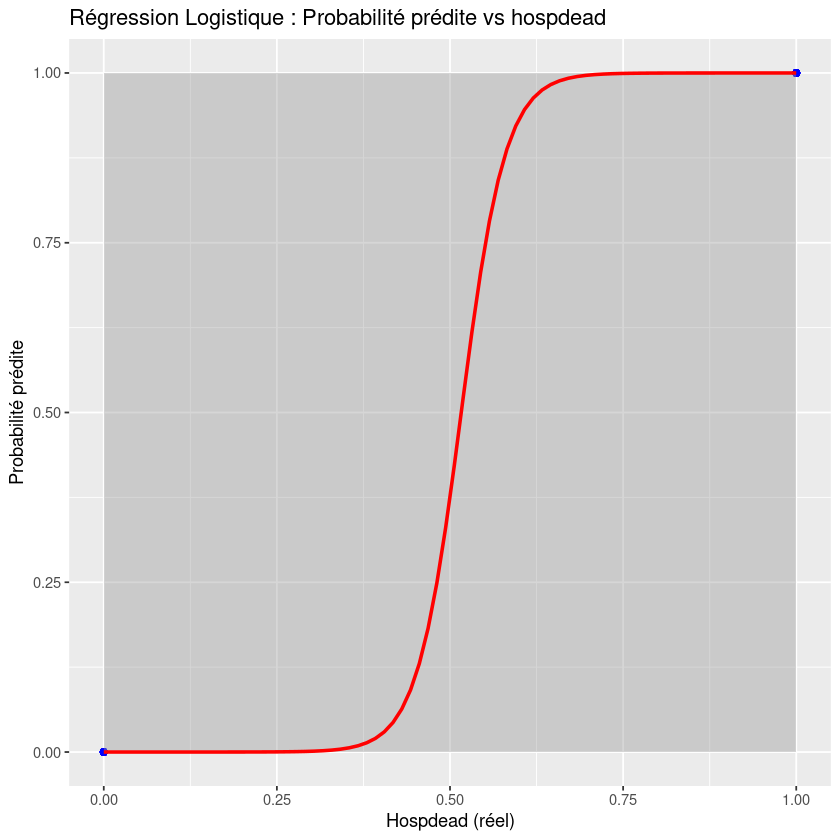

In [54]:
ggplot(data, aes(x = hospdead, y = hatY)) +
  geom_point(alpha = 0.5, color = "blue") +  # Nuage de points
  geom_smooth(method = "glm", method.args = list(family = "binomial"), color = "red") + # Courbe ajustée
  ggtitle("Régression Logistique : Probabilité prédite vs hospdead") +
  xlab("Hospdead (réel)") +
  ylab("Probabilité prédite")

## Séparation

In [55]:
train_index <- sample(1:nrow(data), size = 0.7 * nrow(data))

train_data1 <- data[train_index, ]
test_data1 <- data[setdiff(1:nrow(data), train_index), ]

dim(train_data1)
dim(test_data1)

[1] 5352   47

[1] 2294   47

In [56]:
modreg <- glm(hospdead ~ death + slos + d.time + dzgroup + num.co + edu + scoma + charges + totcst + totmcst + avtisst + race + sps + aps + surv2m + surv6m + prg2m + prg6m + dnr + dnrday + adlp + adls + sfdm2 + adlsc, data = train_data1, family=binomial)
summary(modreg)

Warning message:
“glm.fit: l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Call:
glm(formula = hospdead ~ death + slos + d.time + dzgroup + num.co + 
    edu + scoma + charges + totcst + totmcst + avtisst + race + 
    sps + aps + surv2m + surv6m + prg2m + prg6m + dnr + dnrday + 
    adlp + adls + sfdm2 + adlsc, family = binomial, data = train_data1)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -8.49    0.00    0.00    0.00    8.49  

Coefficients:
                           Estimate Std. Error    z value Pr(>|z|)    
(Intercept)              -1.306e+15  1.678e+07  -77821660   <2e-16 ***
death                     3.213e+14  3.042e+06  105647850   <2e-16 ***
slos                     -6.598e+12  1.030e+05  -64042578   <2e-16 ***
d.time                   -4.304e+11  2.707e+03 -159006982   <2e-16 ***
dzgroupCHF               -1.847e+14  3.511e+06  -52597805   <2e-16 ***
dzgroupCirrhosis         -2.441e+14  4.666e+06  -52316311   <2e-16 ***
dzgroupColon Cancer      -2.840e+14  5.819e+06  -48806771   <2e-16 ***
dzgroupComa               2.073e+1

In [57]:
test_data1$pred <- predict(modreg, newdata=test_data1, type="response")
predictions_class <- ifelse(test_data1$pred > 0.5, 1, 0)
confusion_matrix <- table(test_data1$hospdead, predictions_class)
print(confusion_matrix)

   predictions_class
       0    1
  0 1544   43
  1  225  482


In [58]:
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(paste("Précision:", accuracy))

[1] "Précision: 0.883173496076722"


`geom_smooth()` using formula = 'y ~ x'


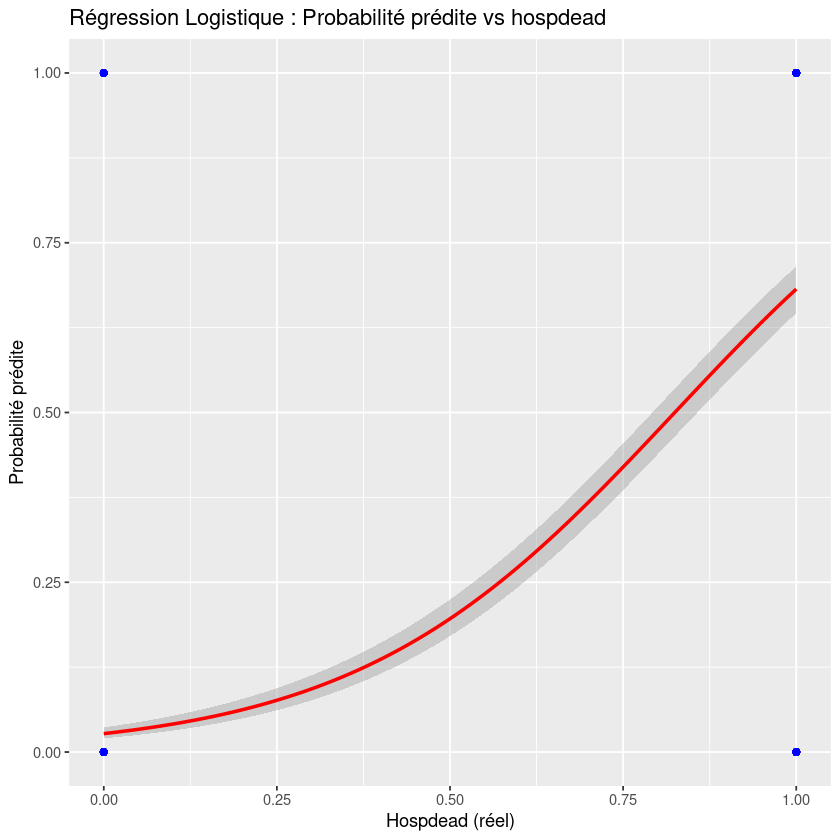

In [59]:
ggplot(test_data1, aes(x = hospdead, y = pred)) +
  geom_point(alpha = 0.5, color = "blue") +  # Nuage de points
  geom_smooth(method = "glm", method.args = list(family = "binomial"), color = "red") + # Courbe ajustée
  ggtitle("Régression Logistique : Probabilité prédite vs hospdead") +
  xlab("Hospdead (réel)") +
  ylab("Probabilité prédite")


In [60]:
A <- ifelse(data$hospdead > 0.5, 1, 0)
A <- A[A == 1]
B <- ifelse(data$hospdead < 0.5, 1, 0)
B <- B[B == 1]

A_t = length(A)/nrow(data)
B_t = length(B)/nrow(data)

inv_At = 1/A_t *B_t
inv_Bt = 1

inv_At

[1] 2.333043

In [61]:
library(caret)

set.seed(123)
index <- createDataPartition(data$hospdead, p = 0.7, list = FALSE)

train_data2 <- data[index, ]
test_data2 <- data[-index, ]

In [70]:
weights <- ifelse(train_data2$hospdead == 1, 1, inv_At)
modreg <- glm(hospdead ~ death + slos + d.time + dzgroup + num.co + edu + scoma + charges + totcst + totmcst + avtisst + race + sps + aps + surv2m + surv6m + prg2m + prg6m + dnr + dnrday + adlp + adls + sfdm2 + adlsc, data = train_data2, family=binomial(link = "logit"), weights = weights)
summary(modreg)

Warning message:
“glm.fit: l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Call:
glm(formula = hospdead ~ death + slos + d.time + dzgroup + num.co + 
    edu + scoma + charges + totcst + totmcst + avtisst + race + 
    sps + aps + surv2m + surv6m + prg2m + prg6m + dnr + dnrday + 
    adlp + adls + sfdm2 + adlsc, family = binomial(link = "logit"), 
    data = train_data2, weights = weights)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-12.97    0.00    0.00    0.00    8.49  

Coefficients:
                           Estimate Std. Error    z value Pr(>|z|)    
(Intercept)              -9.862e+14  1.253e+07  -78691199   <2e-16 ***
death                     4.706e+12  2.001e+06    2351348   <2e-16 ***
slos                     -1.211e+13  7.409e+04 -163434972   <2e-16 ***
d.time                   -7.242e+11  1.811e+03 -399883909   <2e-16 ***
dzgroupCHF                3.353e+14  2.462e+06  136178628   <2e-16 ***
dzgroupCirrhosis          3.226e+14  3.310e+06   97460999   <2e-16 ***
dzgroupColon Cancer       3.072e+14  4.087e+06   75173231   <2e-1

In [71]:
# Ajouter les prédictions directement au dataset de test
test_data2$pred <- predict(modreg, newdata=test_data2, type="response")

predictions_class <- ifelse(test_data2$pred > 0.5, 1, 0)
confusion_matrix <- table(test_data2$hospdead, predictions_class)
print(confusion_matrix)

   predictions_class
       0    1
  0 1575   39
  1  222  457


In [72]:
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(paste("Précision:", accuracy))

[1] "Précision: 0.886175316179677"


`geom_smooth()` using formula = 'y ~ x'


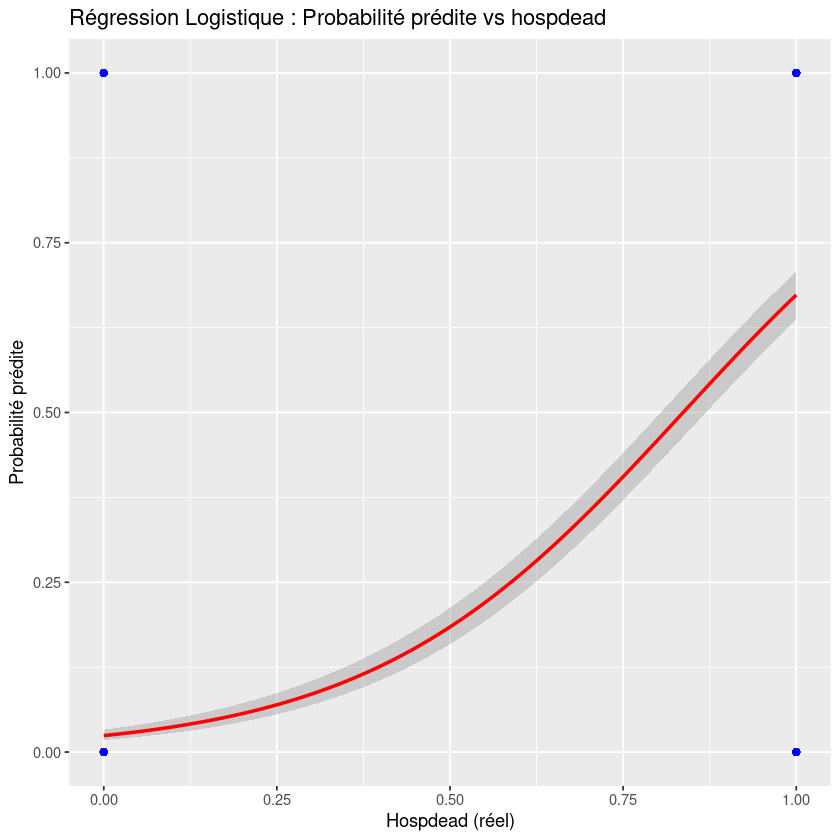

In [73]:
# Créer le graphique avec les données de test
ggplot(test_data2, aes(x = hospdead, y = pred)) +
  geom_point(alpha = 0.5, color = "blue") +  # Nuage de points
  geom_smooth(method = "glm", method.args = list(family = "binomial"), color = "red") + # Courbe ajustée
  ggtitle("Régression Logistique : Probabilité prédite vs hospdead") +
  xlab("Hospdead (réel)") +
  ylab("Probabilité prédite")

